In [ ]:
import numpy as np
import skimage.data as data
import matplotlib.pyplot as plt

# utils


In [ ]:
def circular_kernel(img, d0, shifted=True, low_pass=True):
    """
    low pass filter
    """

    # Calculate the size of the image
    size = np.array(img.shape)
    # Calculate the size of the filter
    fsize = 2 ** np.ceil(np.log2(size)).astype(int)
    print("fsize: ", fsize)
    
    # Calculate the center of the filter
    center = (fsize - size) // 2 if not shifted else fsize // 2

    # Calculate the distance of the pixel from the center
    dist = lambda i,j: np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)

    if low_pass:
      filter_val = lambda i,j: 1 if dist(i,j) <= d0 else 0
    else:
      filter_val = lambda i,j: 1 if dist(i,j) >= d0 else 0

    # Create the filter
    filter = np.zeros(fsize, dtype=complex)
    for i in range(fsize[0]):
        for j in range(fsize[1]):
            # Calculate the filter value
            
            filter[i, j] = filter_val(i, j)
    
    ## DEBUG
    #print(filter.real)
    plt.imshow(filter.real.astype(np.uint8), cmap='gray')
    #plt.title(f'Filter {filter.shape}')
    #plt.show()
    return filter

In [ ]:
def apply_filter(img, filter, shift=True):
    fsize = np.array(filter.shape, dtype=int)
    # Fourier transform the image
    img_f = np.fft.fft2(img, fsize)
    
    if shift:
        # shift the zero frequency component to the center of the filter
        img_f = np.fft.fftshift(img_f)

    # Apply the filter
    result = img_f * filter
    
    if shift:
        # Shift the zero frequency component back to the top left corner
        result = np.fft.ifftshift(result)

    # Inverse Fourier transform the image
    result = np.fft.ifft2(result).real

    return np.array(result, dtype=np.uint8)

# 10.1) 
9. ödevde kullanılan ideal alçak geçiren filtre işlemini aynı kesim frekansları için Butterworth filtresi ile tekrarlayın ve Karşılaştırın.


In [ ]:
def butterworth_kernel():
    

In [20]:
cutoff_coeffs = np.arange(0.05, 1, 0.15)

In [21]:
import scipy.signal as signal

In [27]:
b, a = signal.butter(5, 0.5, 'low')

In [29]:
a, b

(array([ 1.00000000e+00, -4.16333634e-16,  6.33436854e-01, -1.31860534e-16,
         5.57280900e-02, -3.09353043e-18]),
 array([0.0527864 , 0.26393202, 0.52786405, 0.52786405, 0.26393202,
        0.0527864 ]))

# 10.2)
Farklı c1 ve c2 parametreleri için 
* (c1 = [0.5, 1, 1.2])
* (c2 = [0, 0.5, 1, 1.5])

frekans bölgesinde keskinleştirme işlemi yapın ve tartışın.

In [ ]:
def sharpening_kernel(img, d0, c1, c2):
    """
    filter = c1 + c2 * H(high_pass)
    """

    high_pass_kernel = circular_kernel(img, d0, low_pass=False)
    
    # Create the filter
    kernel = np.zeros(high_pass_kernel.shape, dtype=complex)
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            # Calculate the filter value
            kernel[i, j] = c1 + c2 * high_pass_kernel[i, j]    

    return kernel

img_org = data.camera()
plt.imshow(img_org, cmap='gray')
plt.show()

kernel = sharpening_kernel(img_org, d0=10, c1=1, c2=1)
out = apply_filter(img_org, kernel)
plt.imshow(out, cmap='gray')

fsize:  [512 512]


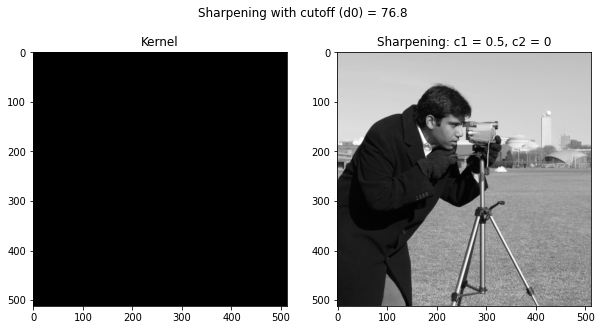

fsize:  [512 512]


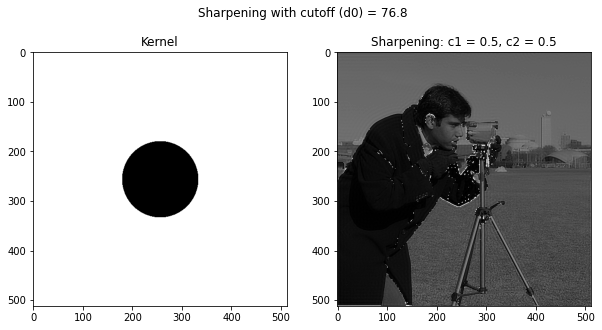

fsize:  [512 512]


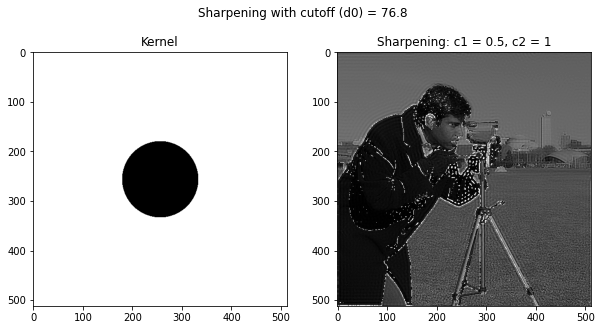

fsize:  [512 512]


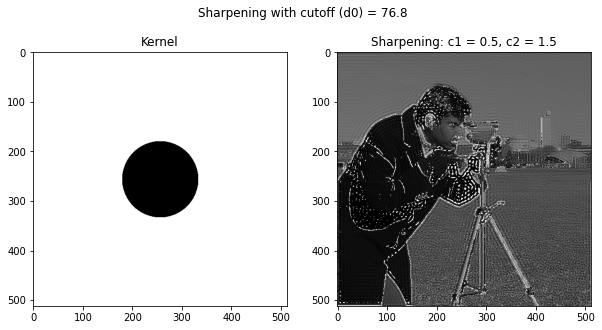

fsize:  [512 512]


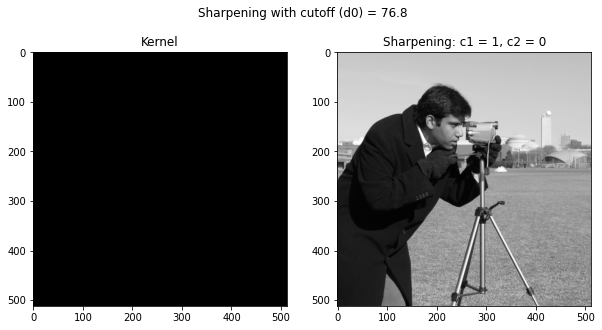

fsize:  [512 512]


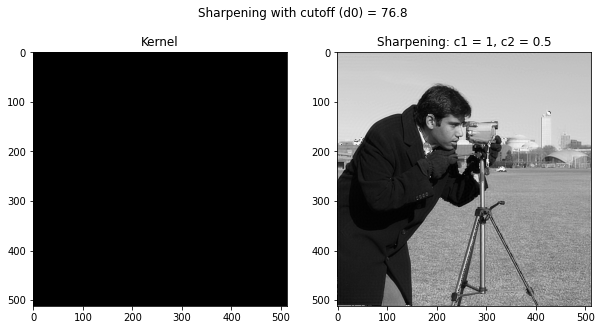

fsize:  [512 512]


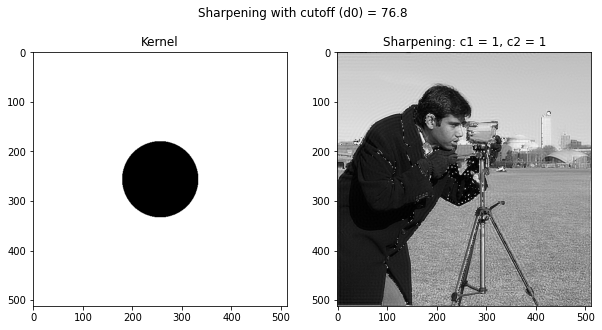

fsize:  [512 512]


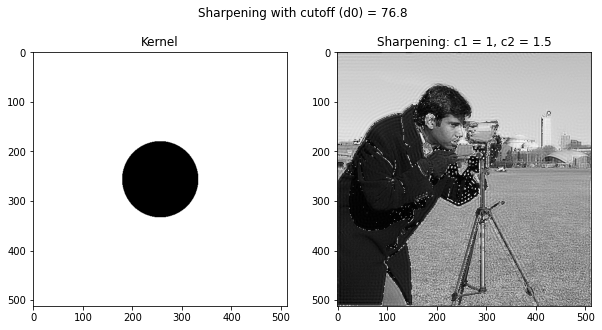

fsize:  [512 512]


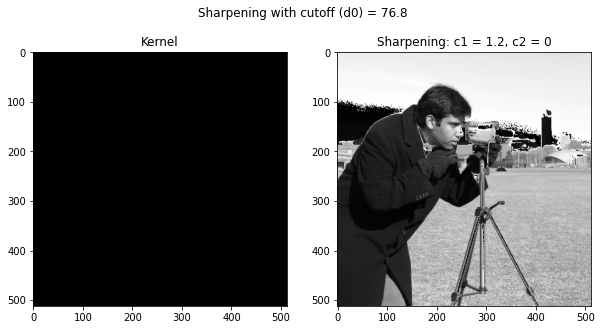

fsize:  [512 512]


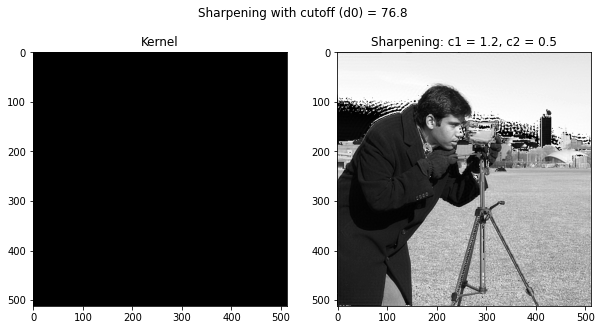

fsize:  [512 512]


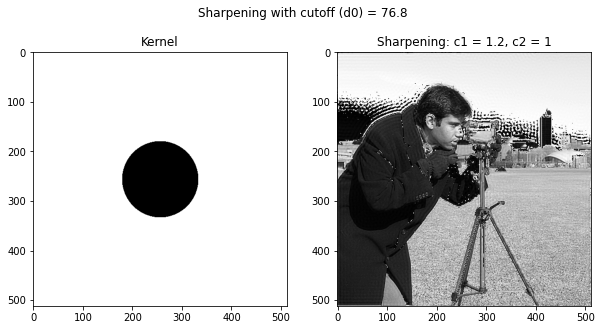

fsize:  [512 512]


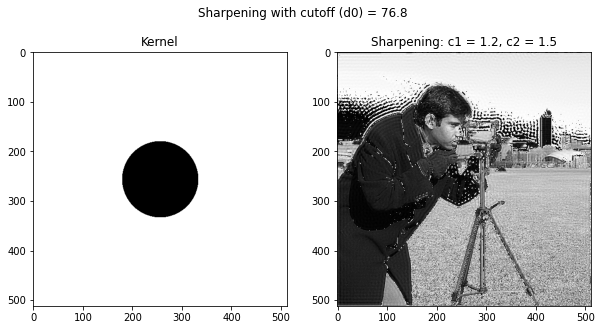

In [15]:
c1_list = [0.5, 1, 1.2]
c2_list = [0, 0.5, 1, 1.5]
cutoff_coeffs = [0.15]


for d0 in cutoff_coeffs:
    d0 = img_org.shape[0] * d0

    for c1 in c1_list:
        for c2 in c2_list:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
            fig.suptitle(f'Sharpening with cutoff (d0) = {d0}')
            
            # Create the filter
            kernel = sharpening_kernel(img_org, d0, c1, c2)
            
            # Apply the filter
            img_sharp = apply_filter(img_org, kernel)
            
            # Show the results
            ax1.imshow(kernel.real.astype(np.uint8), cmap='gray')
            ax1.set_title(f'Kernel')

            ax2.imshow(img_sharp, cmap='gray')
            ax2.set_title(f'Sharpening: c1 = {c1}, c2 = {c2}')
            plt.show()